In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb"

# Read the file and parse the dictionary
local_vars = {'np': np}
with open(file_path, 'r') as file:
    exec(file.read(), local_vars)  # Execute the file content with NumPy in scope

channel_groups = local_vars.get('channel_groups')
if channel_groups is None:
    raise ValueError(f"'channel_groups' not found in {file_path}")

# Assuming channel_groups is loaded from Step 1
data = []
for group_id, group_data in channel_groups.items():
    channels = group_data['channels']
    geometry = group_data['geometry']
    for channel in channels:
        x, y = geometry[channel]
        data.append({
            'group_id': group_id,
            'channel_id': channel,
            'x': x,
            'y': y
        })
probe_df = pd.DataFrame(data)

import os
def get_pkl_files(folder_path):
    # List all files in the directory
    all_files = os.listdir(folder_path)
    # Filter files that end with "withDLC.pkl"
    pkl_files = [f for f in all_files if f.endswith("withDLC.pkl")]
    return pkl_files

# Example usage
folder_path = r"S:\Sachuriga\filre_with_table\adjust_y_with _meanVAlue\clusters_with_tsneLabel"  # Replace with your actual folder path
adjust_path = r"S:\Sachuriga\filre_with_table\adjust_y_with _meanVAlue\clusters_with_tsneLabel"
new_files = []
pkl_files = get_pkl_files(folder_path)
for file in pkl_files:
    df_unit_table = pd.read_pickle(fr'{folder_path}/{file}').reset_index()
    # df_unit_table=dff[dff['unit_quality']=="good"]
    # #df_unit_table = df['unit_table'][0]
    # df_unit_table=dff.reset_index(drop=True)
    new_y = []
    group = []
    for i in range(len(df_unit_table)):
        group.append(probe_df[probe_df['channel_id']==df_unit_table['ch'][i]]['group_id'].values[0])
        
    df_unit_table['group'] = group
    unique_groups = df_unit_table['group'].unique()  # Re
    df_list = [df_unit_table[df_unit_table['group'] == group].reset_index(drop=True) for group in unique_groups]

    df_list_actual=[]
    for i, df in enumerate(df_list):
   
        median_value = np.median(df[df['cell_type']== "pyramidal"]['y'])
        mean_value = np.mean(df[df['cell_type']== "pyramidal"]['y'])
        y_pos=[]
        y_pos_mean=[]
        for i in df['y']:
            y_pos.append(i-median_value+75)
            y_pos_mean.append(i-mean_value+75)
        df['addjust y'] = y_pos_mean
        df['addjust y median'] = y_pos
        df_list_actual.append(df)
    df_list_actual = pd.concat(df_list_actual, axis=0)
    if os.path.exists(fr"{adjust_path}/{file}"):
        os.remove(fr"{adjust_path}/{file}")
    df_list_actual.to_pickle(fr"{adjust_path}/{file}")

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\sachur\AppData\Local\anaconda3\envs\te

In [ ]:
import os
def get_pkl_files(folder_path):
    # List all files in the directory
    all_files = os.listdir(folder_path)
    # Filter files that end with "withDLC.pkl"
    pkl_files = [f for f in all_files if f.endswith("withDLC.pkl")]
    return pkl_files

target_prefixes_control = ['65165', '65091', '63383', '66539', '65622']
target_prefixes_exp = ['65588', '63385', '66538', '66537', '66922']

for file in pkl_files:
    df = pd.read_pickle(fr'{folder_path}/{file}')
    df=df[df['cell_type']=="Pyramidal cells"]
    df['animal_id'][0]

C:\Users\sachur\AppData\Local\Temp\ipykernel_29100\3450235213.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['addjust y']= y_pos
C:\Users\sachur\AppData\Local\Temp\ipykernel_29100\3450235213.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['addjust y']= y_pos
C:\Users\sachur\AppData\Local\Temp\ipykernel_29100\3450235213.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:
import os
import pandas as pd

folder_path = r"S:\Sachuriga\filre_with_table\adjust/test"

# Function to get pickle files
def get_pkl_files(folder_path):
    all_files = os.listdir(folder_path)
    pkl_files = [f for f in all_files if f.endswith("withDLC.pkl")]
    return pkl_files

# Define group prefixes
target_prefixes_control = ['65165', '65091', '63383', '66539', '65622']
target_prefixes_exp = ['65588', '63385', '66538', '66537', '66922']

# Get the list of pickle files
pkl_files = get_pkl_files(folder_path)

# Initialize a list to store all DataFrames
all_dfs = []

# Process each pickle file
for file in pkl_files:
    # Load the DataFrame
    df = pd.read_pickle(os.path.join(folder_path, file))
    # Filter for Pyramidal cells
    df = df[df['cell_type'] == "pyramidal"]
    # Check if the DataFrame is empty after filtering
    if df.empty:
        print(f"Warning: File {file} has no pyramidal cells")
        continue
    # Get the animal_id
    try:
        animal_id = df['animal_id'].iloc[0]
    except KeyError:
        print(f"Warning: File {file} does not have 'animal_id' column")
        continue
    # Determine the group based on the animal_id prefix
    if any(animal_id.startswith(prefix) for prefix in target_prefixes_control):
        df['group_ani'] = 'control'
    elif any(animal_id.startswith(prefix) for prefix in target_prefixes_exp):
        df['group_ani'] = 'exp'
    else:
        print(f"Warning: animal_id {animal_id} does not match any group")
        continue  # Skip files that don’t match any group
    # Append the DataFrame to the list
    all_dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(all_dfs, ignore_index=True)

# Collect the specified columns collectively for each group
# For control group
control_data = combined_df[combined_df['group_ani'] == 'control'][
    ['addjust y', 'matlab_test_stat_si', 'matlab_sparsity', 'matlab_maxfsize','mean_firing_rate','bursting_index']
]
# For experimental group
exp_data = combined_df[combined_df['group_ani'] == 'exp'][
    ['addjust y', 'matlab_test_stat_si', 'matlab_sparsity', 'matlab_maxfsize','mean_firing_rate','bursting_index']
]

# Optional: If you need the values as lists
control_addjust_y = control_data['addjust y'].to_list()
control_matlab_test_stat_si = control_data['matlab_test_stat_si'].to_list()
control_matlab_sparsity = control_data['matlab_sparsity'].to_list()
control_matlab_maxfsize = control_data['matlab_maxfsize'].to_list()

exp_addjust_y = exp_data['addjust y'].to_list()
exp_matlab_test_stat_si = exp_data['matlab_test_stat_si'].to_list()
exp_matlab_sparsity = exp_data['matlab_sparsity'].to_list()
exp_matlab_maxfsize = exp_data['matlab_maxfsize'].to_list()

C:\Users\sachur\AppData\Local\Temp\ipykernel_20656\1374147107.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['depth'] = combined_df['y_pos2ripple'].apply(lambda x: 'deep' if x >= 0 else 'superficial')
C:\Users\sachur\AppData\Local\Temp\ipykernel_20656\1374147107.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['group_depth'] = combined_df['group_ani'] + "_" + combined_df['depth']
C:\Users\sachur\AppData\Local\Temp\ipykernel_20656\1374147107.py:104: FutureWarning: Use "auto" to set automatic gray


--- Analysis for Test Stat SI ---
Two-Way ANOVA for Test Stat SI (Reference):
                           sum_sq     df         F    PR(>F)
C(group_ani)             3.871122    1.0  5.333287  0.021388
C(depth)                 3.266329    1.0  4.500057  0.034457
C(group_ani):C(depth)    0.123719    1.0  0.170449  0.679916
Residual               316.467003  436.0       NaN       NaN

Normality of residuals (Shapiro-Wilk): stat = 0.969, p = 0.0000
Homogeneity of variances (Levene): stat = 1.301, p = 0.2736

Sample sizes per group:
group_depth
exp_deep               164
control_deep           141
control_superficial     77
exp_superficial         58
Name: count, dtype: int64

Kruskal-Wallis Test for Test Stat SI:
Stat = 8.296, p = 0.0403

Dunn's Post-hoc Test for Test Stat SI:
                     control_deep  control_superficial  exp_deep  \
control_deep             1.000000             1.000000  0.661101   
control_superficial      1.000000             1.000000  1.000000   
exp_deep    

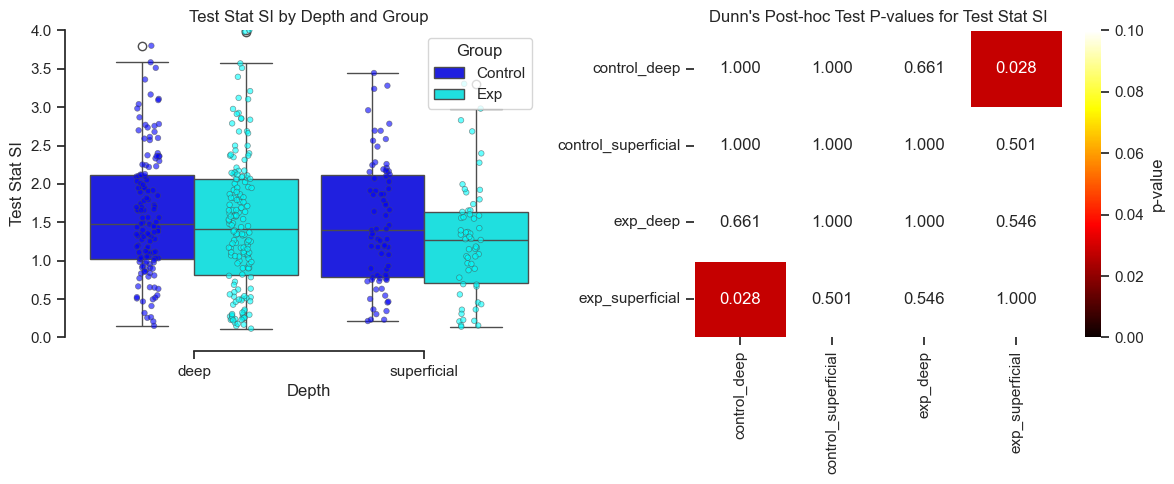


--- Analysis for Sparsity ---
Two-Way ANOVA for Sparsity (Reference):
                          sum_sq     df         F    PR(>F)
C(group_ani)            0.457325    1.0  8.162574  0.004481
C(depth)                0.168634    1.0  3.009873  0.083465
C(group_ani):C(depth)   0.000335    1.0  0.005988  0.938356
Residual               24.427794  436.0       NaN       NaN

Normality of residuals (Shapiro-Wilk): stat = 0.920, p = 0.0000
Homogeneity of variances (Levene): stat = 2.105, p = 0.0989

Sample sizes per group:
group_depth
exp_deep               164
control_deep           141
control_superficial     77
exp_superficial         58
Name: count, dtype: int64

Kruskal-Wallis Test for Sparsity:
Stat = 8.059, p = 0.0448

Dunn's Post-hoc Test for Sparsity:
                     control_deep  control_superficial  exp_deep  \
control_deep             1.000000             1.000000  0.615027   
control_superficial      1.000000             1.000000  1.000000   
exp_deep                 0.615027

C:\Users\sachur\AppData\Local\Temp\ipykernel_20656\1374147107.py:104: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='depth', y=var, hue='group_ani', data=combined_df, ax=ax1,


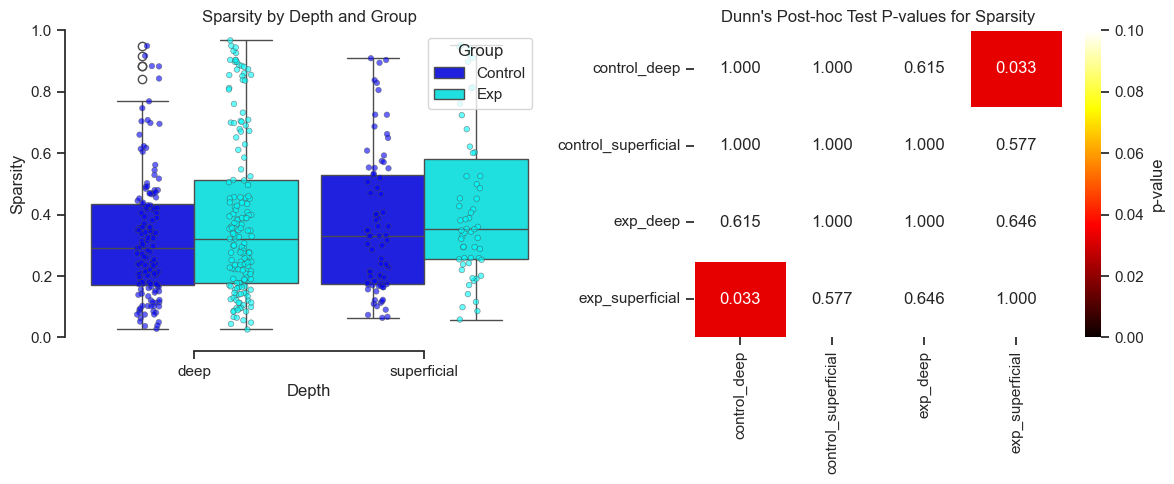


--- Analysis for Max F Size ---
Two-Way ANOVA for Max F Size (Reference):
                             sum_sq     df          F    PR(>F)
C(group_ani)           1.254031e+05    1.0  11.530151  0.000749
C(depth)               2.476165e+04    1.0   2.276702  0.132077
C(group_ani):C(depth)  1.754142e+02    1.0   0.016128  0.899003
Residual               4.600592e+06  423.0        NaN       NaN

Normality of residuals (Shapiro-Wilk): stat = 0.785, p = 0.0000
Homogeneity of variances (Levene): stat = 3.603, p = 0.0135

Sample sizes per group:
group_depth
exp_deep               164
control_deep           141
control_superficial     77
exp_superficial         58
Name: count, dtype: int64

Kruskal-Wallis Test for Max F Size:
Stat = 10.947, p = 0.0120

Dunn's Post-hoc Test for Max F Size:
                     control_deep  control_superficial  exp_deep  \
control_deep             1.000000             1.000000  0.136346   
control_superficial      1.000000             1.000000  1.000000   
exp_

C:\Users\sachur\AppData\Local\Temp\ipykernel_20656\1374147107.py:104: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='depth', y=var, hue='group_ani', data=combined_df, ax=ax1,


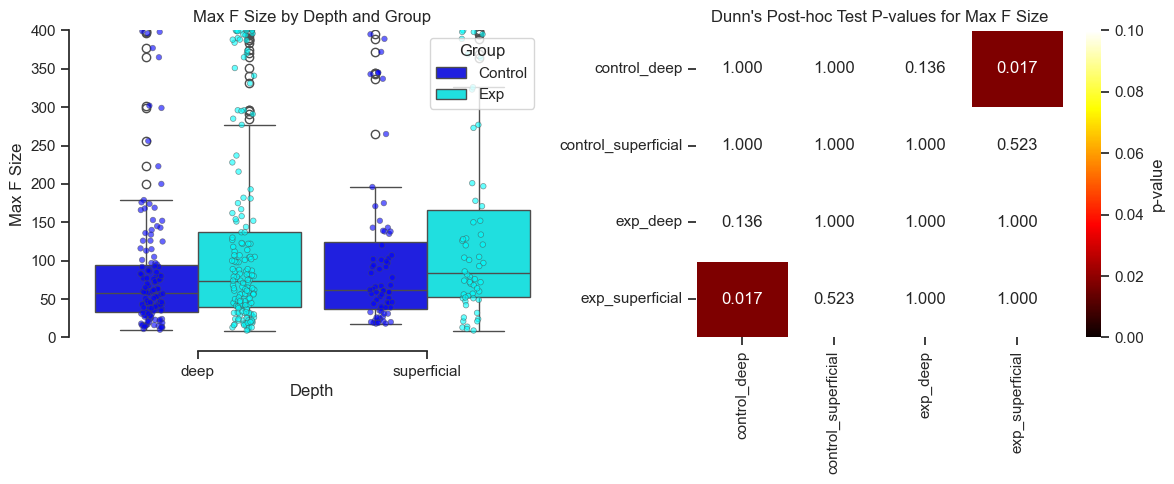


--- Analysis for Mean Firing Rate ---
Two-Way ANOVA for Mean Firing Rate (Reference):
                            sum_sq     df          F    PR(>F)
C(group_ani)             45.001567    1.0  13.253276  0.000305
C(depth)                  1.217119    1.0   0.358450  0.549679
C(group_ani):C(depth)     0.515169    1.0   0.151721  0.697086
Residual               1480.440254  436.0        NaN       NaN

Normality of residuals (Shapiro-Wilk): stat = 0.815, p = 0.0000
Homogeneity of variances (Levene): stat = 3.275, p = 0.0210

Sample sizes per group:
group_depth
exp_deep               164
control_deep           141
control_superficial     77
exp_superficial         58
Name: count, dtype: int64

Kruskal-Wallis Test for Mean Firing Rate:
Stat = 13.479, p = 0.0037

Dunn's Post-hoc Test for Mean Firing Rate:
                     control_deep  control_superficial  exp_deep  \
control_deep             1.000000              1.00000  0.008887   
control_superficial      1.000000              1.0000

C:\Users\sachur\AppData\Local\Temp\ipykernel_20656\1374147107.py:104: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='depth', y=var, hue='group_ani', data=combined_df, ax=ax1,


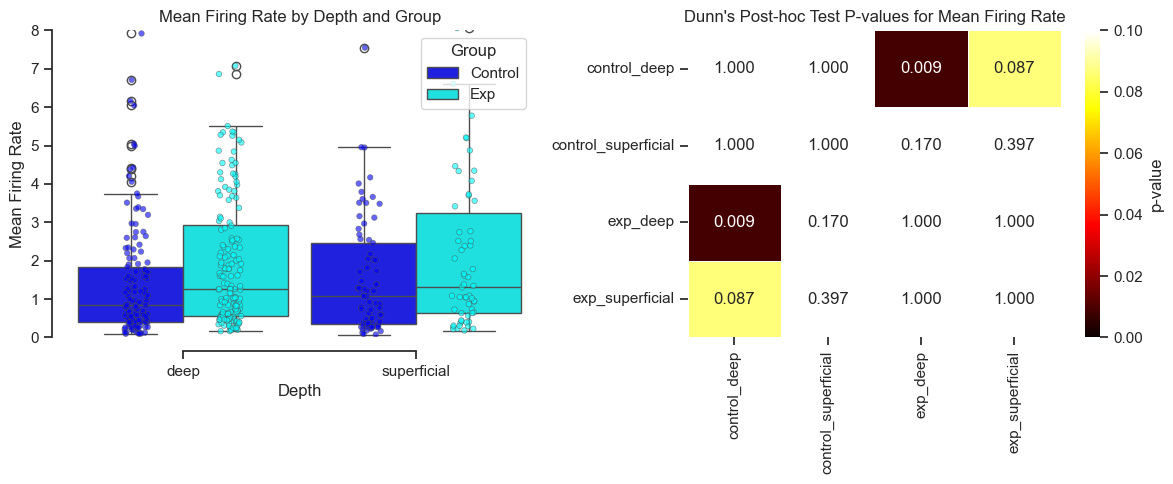


--- Analysis for Bursting Index ---
Two-Way ANOVA for Bursting Index (Reference):
                            sum_sq     df         F    PR(>F)
C(group_ani)              0.174300    1.0  0.037878  0.845779
C(depth)                  1.127494    1.0  0.245020  0.620853
C(group_ani):C(depth)     1.349403    1.0  0.293244  0.588426
Residual               2006.317433  436.0       NaN       NaN

Normality of residuals (Shapiro-Wilk): stat = 0.360, p = 0.0000
Homogeneity of variances (Levene): stat = 0.351, p = 0.7887

Sample sizes per group:
group_depth
exp_deep               164
control_deep           141
control_superficial     77
exp_superficial         58
Name: count, dtype: int64

Kruskal-Wallis Test for Bursting Index:
Stat = 1.917, p = 0.5899


C:\Users\sachur\AppData\Local\Temp\ipykernel_20656\1374147107.py:104: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='depth', y=var, hue='group_ani', data=combined_df, ax=ax1,


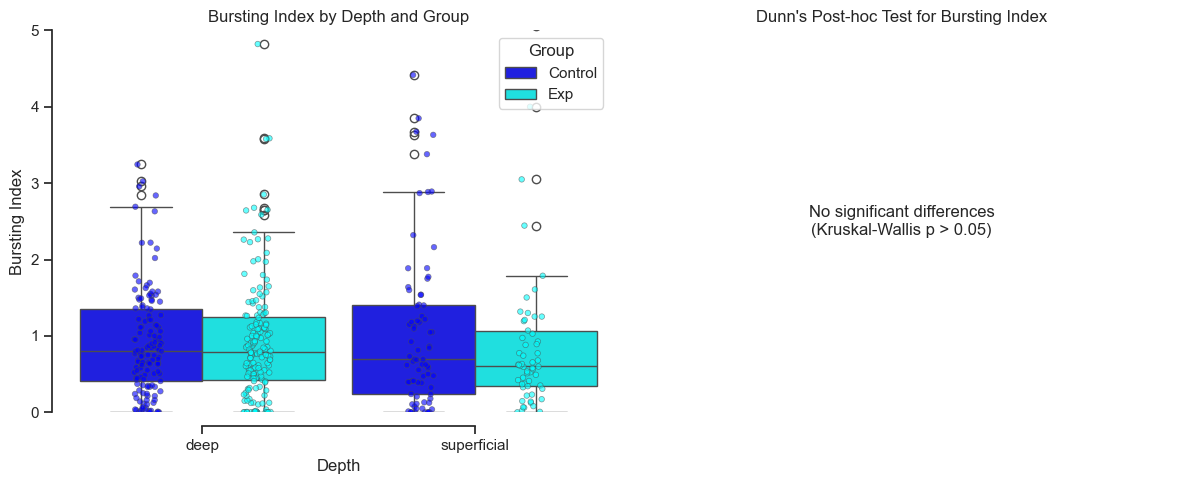

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp

folder_path = r"S:\Sachuriga\filre_with_table\adjust_y_with _meanVAlue\clusters_with_tsneLabel\ripple_max\py_only"

# Function to get pickle files
def get_pkl_files(folder_path):
    all_files = os.listdir(folder_path)
    pkl_files = [f for f in all_files if f.endswith("withDLC.pkl")]
    return pkl_files

# Define group prefixes
target_prefixes_control = ['65165', '65091', '63383', '66539', '65622']
target_prefixes_exp = ['65588', '63385', '66538', '66537', '66922']

# Get the list of pickle files
pkl_files = get_pkl_files(folder_path)

# Initialize a list to store all DataFrames
all_dfs = []

# Process each pickle file
for file in pkl_files:
    df = pd.read_pickle(os.path.join(folder_path, file))
    df = df[(df['cell_type'] == "pyramidal") &  (df['session'] == "A")]
    if df.empty:
        print(f"Warning: File {file} has no pyramidal cells")
        continue
    try:
        animal_id = df['animal_id'].iloc[0]
    except KeyError:
        print(f"Warning: File {file} does not have 'animal_id' column")
        continue
    if any(animal_id.startswith(prefix) for prefix in target_prefixes_control):
        df['group_ani'] = 'control'
    elif any(animal_id.startswith(prefix) for prefix in target_prefixes_exp):
        df['group_ani'] = 'exp'
    else:
        print(f"Warning: animal_id {animal_id} does not match any group")
        continue
    all_dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(all_dfs, ignore_index=True)

# Add depth category (deep: >75, superficial: <75)
combined_df['depth'] = combined_df['y_pos2ripple'].apply(lambda x: 'deep' if x >= 0 else 'superficial')
combined_df['group_depth'] = combined_df['group_ani'] + "_" + combined_df['depth']

# Variables to analyze
variables = ['matlab_test_stat_si', 'matlab_sparsity', 'matlab_maxfsize', 'mean_firing_rate', 'bursting_index']
titles = ['Test Stat SI', 'Sparsity', 'Max F Size', 'Mean Firing Rate', 'Bursting Index']

# Define specific y-limits for each variable
ylim_dict = {
    'matlab_test_stat_si': (0, 4),
    'matlab_sparsity': (0, 1),
    'matlab_maxfsize': (0, 400),
    'mean_firing_rate': (0, 8),
    'bursting_index': (0, 5)
}

# Set up the plotting theme
sns.set_theme(style="ticks", palette="pastel")

# Diagnostic tests and plotting for each variable
for var, title in zip(variables, titles):
    print(f"\n--- Analysis for {title} ---")
    
    # Two-Way ANOVA (for reference)
    model = ols(f'{var} ~ C(group_ani) + C(depth) + C(group_ani):C(depth)', data=combined_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"Two-Way ANOVA for {title} (Reference):")
    print(anova_table)
    
    # Check assumptions
    shapiro_stat, shapiro_p = shapiro(model.resid)
    print(f"\nNormality of residuals (Shapiro-Wilk): stat = {shapiro_stat:.3f}, p = {shapiro_p:.4f}")
    groups = [combined_df[combined_df['group_depth'] == g][var].dropna() for g in combined_df['group_depth'].unique()]
    levene_stat, levene_p = levene(*groups)
    print(f"Homogeneity of variances (Levene): stat = {levene_stat:.3f}, p = {levene_p:.4f}")
    sample_sizes = combined_df['group_depth'].value_counts()
    print("\nSample sizes per group:")
    print(sample_sizes)
    
    # Kruskal-Wallis test
    kruskal_stat, kruskal_p = kruskal(*groups)
    print(f"\nKruskal-Wallis Test for {title}:")
    print(f"Stat = {kruskal_stat:.3f}, p = {kruskal_p:.4f}")
    
    # Create figure for boxplot and heatmap
    fig = plt.figure(figsize=(12, 5))
    
    # Boxplot on the left
    ax1 = fig.add_subplot(1, 2, 1)
    sns.boxplot(x='depth', y=var, hue='group_ani', data=combined_df, ax=ax1, 
                palette={'control': 'blue', 'exp': 'cyan'}, width=0.9, dodge=True)
    sns.stripplot(x='depth', y=var, hue='group_ani', data=combined_df, ax=ax1, 
                  size=4, jitter=True, dodge=True, 
                  palette={'control': 'blue', 'exp': 'cyan'}, 
                  alpha=0.6, edgecolor="gray", linewidth=0.5)
    ax1.set_title(f'{title} by Depth and Group')
    ax1.set_xlabel('Depth')
    ax1.set_ylabel(title)
    ax1.set_ylim(ylim_dict[var])
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[:2], ['Control', 'Exp'], title='Group', loc='upper right')
    
    # Dunn's test and heatmap on the right if significant
    if kruskal_p < 0.05:
        print(f"\nDunn's Post-hoc Test for {title}:")
        dunn_result = sp.posthoc_dunn(combined_df, val_col=var, group_col='group_depth', p_adjust='bonferroni')
        print(dunn_result)
        
        ax2 = fig.add_subplot(1, 2, 2)
        # Use 'hot' colormap, with colors starting at p=0.1
        sns.heatmap(dunn_result, annot=True, cmap='hot', 
                    vmin=0, vmax=0.1, fmt='.3f', linewidths=0.5, ax=ax2,
                    cbar_kws={'label': 'p-value'})
        ax2.set_title(f"Dunn's Post-hoc Test P-values for {title}")
    else:
        # If not significant, add a text box instead of heatmap
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.text(0.5, 0.5, 'No significant differences\n(Kruskal-Wallis p > 0.05)', 
                 ha='center', va='center', fontsize=12)
        ax2.set_title(f"Dunn's Post-hoc Test for {title}")
        ax2.axis('off')
    
    sns.despine(ax=ax1, offset=10, trim=True)
    plt.tight_layout()
    plt.show()

C:\Users\sachur\AppData\Local\Temp\ipykernel_20656\292755939.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['depth'] = combined_df['y_pos2ripple'].apply(lambda x: 'deep' if x > 0 else 'superficial')
C:\Users\sachur\AppData\Local\Temp\ipykernel_20656\292755939.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['group_depth'] = combined_df['group_ani'] + '_' + combined_df['depth']


Test Stat SI - Control_deep vs. Exp_deep: statistic=0.134, p-value=0.1147
Test Stat SI - Control_superficial vs. Exp_superficial: statistic=0.222, p-value=0.0652
Sparsity - Control_deep vs. Exp_deep: statistic=0.134, p-value=0.1147
Sparsity - Control_superficial vs. Exp_superficial: statistic=0.222, p-value=0.0652
Max F Size - Control_deep vs. Exp_deep: statistic=0.159, p-value=0.0425
Max F Size - Control_superficial vs. Exp_superficial: statistic=0.211, p-value=0.0963
Mean Firing Rate - Control_deep vs. Exp_deep: statistic=0.172, p-value=0.0197
Mean Firing Rate - Control_superficial vs. Exp_superficial: statistic=0.161, p-value=0.3151
Bursting Index - Control_deep vs. Exp_deep: statistic=0.075, p-value=0.7450
Bursting Index - Control_superficial vs. Exp_superficial: statistic=0.157, p-value=0.3451


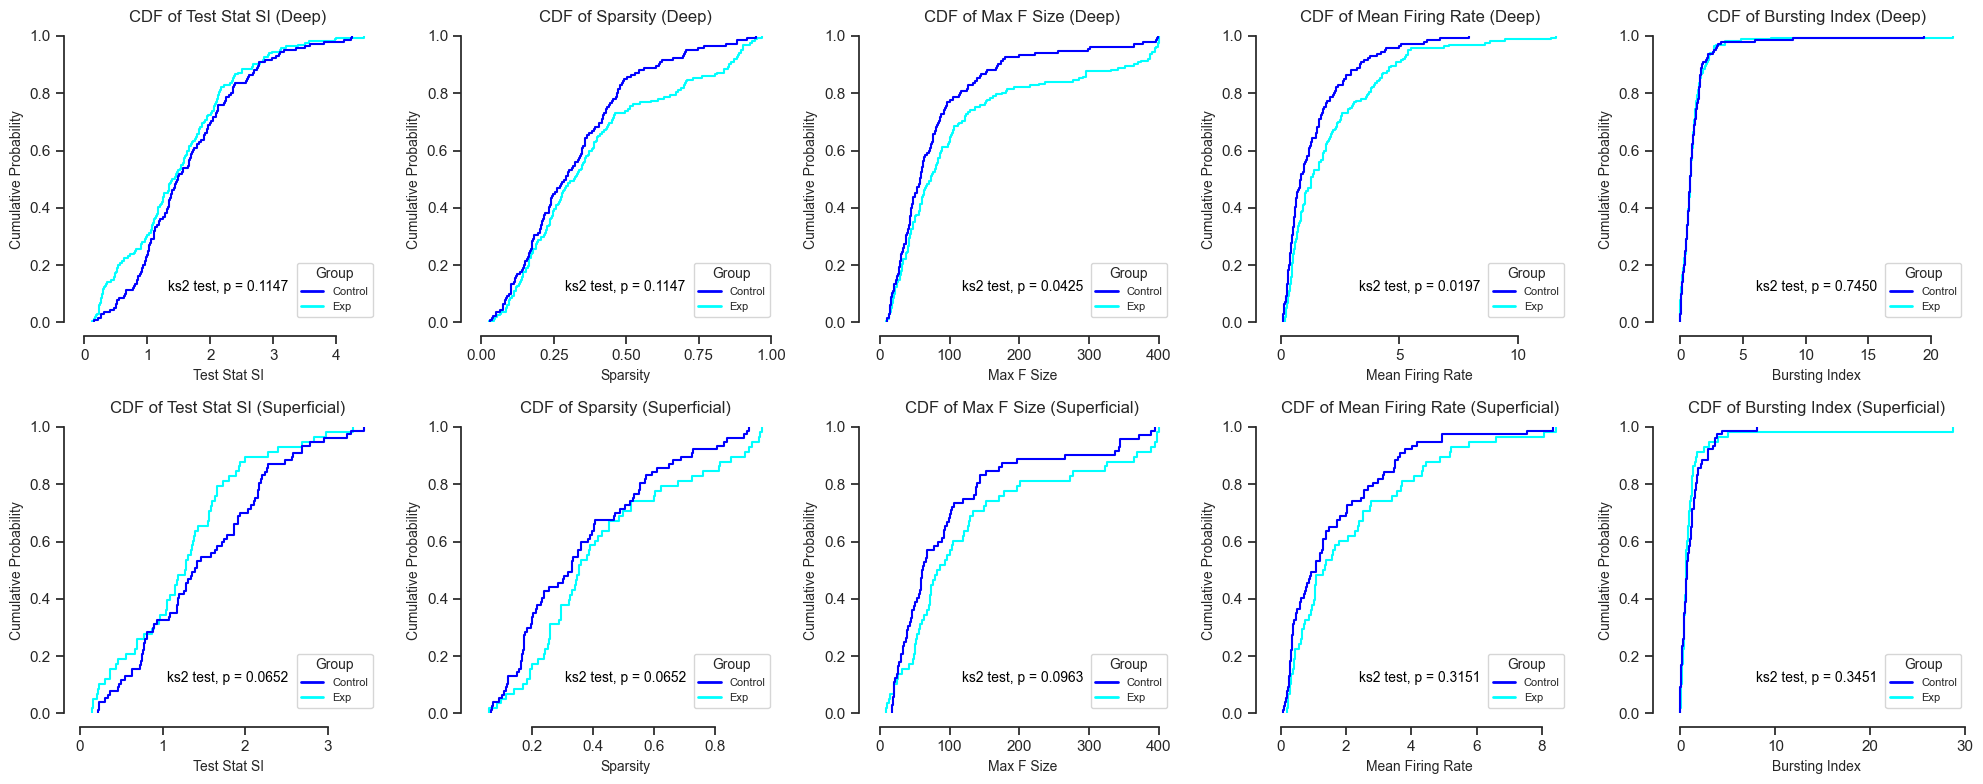

In [8]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Data loading
folder_path = r"S:\Sachuriga\filre_with_table\adjust_y_with _meanVAlue\clusters_with_tsneLabel\ripple_max\py_only"

def get_pkl_files(folder_path):
    all_files = os.listdir(folder_path)
    pkl_files = [f for f in all_files if f.endswith("withDLC.pkl")]
    return pkl_files

target_prefixes_control = ['65165', '65091', '63383', '66539', '65622']
target_prefixes_exp = ['65588', '63385', '66538', '66537', '66922']
pkl_files = get_pkl_files(folder_path)

all_dfs = []
for file in pkl_files:
    df = pd.read_pickle(os.path.join(folder_path, file))
    df = df[(df['cell_type'] == "pyramidal") & (df['session'] == "A")]
    if df.empty:
        print(f"Warning: File {file} has no pyramidal cells")
        continue
    try:
        animal_id = df['animal_id'].iloc[0]
    except KeyError:
        print(f"Warning: File {file} does not have 'animal_id' column")
        continue
    if any(animal_id.startswith(prefix) for prefix in target_prefixes_control):
        df['group_ani'] = 'control'
    elif any(animal_id.startswith(prefix) for prefix in target_prefixes_exp):
        df['group_ani'] = 'exp'
    else:
        print(f"Warning: animal_id {animal_id} does not match any group")
        continue
    all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df['depth'] = combined_df['y_pos2ripple'].apply(lambda x: 'deep' if x > 0 else 'superficial')
combined_df['group_depth'] = combined_df['group_ani'] + '_' + combined_df['depth']

# Variables and titles
variables = ['matlab_test_stat_si', 'matlab_sparsity', 'matlab_maxfsize', 'mean_firing_rate', 'bursting_index']
titles = ['Test Stat SI', 'Sparsity', 'Max F Size', 'Mean Firing Rate', 'Bursting Index']

# ECDF Plotting with 2x5 grid (2 rows for depth, 5 columns for variables)
sns.set_theme(style="ticks")
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# Custom palette: control in blue, exp in cyan
palette = {'control': 'blue', 'exp': 'cyan'}

for i, (var, title) in enumerate(zip(variables, titles)):
    # Control_deep vs. Exp_deep
    control_deep = combined_df[(combined_df['group_ani'] == 'control') & (combined_df['depth'] == 'deep')][var].dropna()
    exp_deep = combined_df[(combined_df['group_ani'] == 'exp') & (combined_df['depth'] == 'deep')][var].dropna()
    ks_stat_deep, p_valued = ks_2samp(control_deep, exp_deep)
    print(f"{title} - Control_deep vs. Exp_deep: statistic={ks_stat_deep:.3f}, p-value={p_valued:.4f}")
    
    # Control_superficial vs. Exp_superficial
    control_superficial = combined_df[(combined_df['group_ani'] == 'control') & (combined_df['depth'] == 'superficial')][var].dropna()
    exp_superficial = combined_df[(combined_df['group_ani'] == 'exp') & (combined_df['depth'] == 'superficial')][var].dropna()
    ks_stat_sup, p_values = ks_2samp(control_superficial, exp_superficial)
    print(f"{title} - Control_superficial vs. Exp_superficial: statistic={ks_stat_sup:.3f}, p-value={p_values:.4f}")

    # Deep subplot
    sns.ecdfplot(data=combined_df[combined_df['depth'] == 'deep'], x=var, hue='group_ani', 
                ax=axes[0, i], palette=palette)
    axes[0, i].set_title(f'CDF of {title} (Deep)', fontsize=12, pad=10)
    axes[0, i].set_xlabel(title, fontsize=10)
    axes[0, i].set_ylabel('Cumulative Probability', fontsize=10)
    axes[0, i].legend(title='Group', labels=['Control', 'Exp'], 
                    handles=[plt.Line2D([0], [0], color=palette['control'], lw=2),
                            plt.Line2D([0], [0], color=palette['exp'], lw=2)], 
                    loc='lower right', fontsize=8, title_fontsize=10)
    axes[0, i].text(0.5, 0.1, f'ks2 test, p = {p_valued:.4f}', ha='center', va='bottom', 
                    transform=axes[0, i].transAxes, fontsize=10, color='black')

    # Superficial subplot
    sns.ecdfplot(data=combined_df[combined_df['depth'] == 'superficial'], x=var, hue='group_ani', 
                ax=axes[1, i], palette=palette)
    axes[1, i].set_title(f'CDF of {title} (Superficial)', fontsize=12, pad=10)
    axes[1, i].set_xlabel(title, fontsize=10)
    axes[1, i].set_ylabel('Cumulative Probability', fontsize=10)
    axes[1, i].legend(title='Group', labels=['Control', 'Exp'], 
                    handles=[plt.Line2D([0], [0], color=palette['control'], lw=2),
                            plt.Line2D([0], [0], color=palette['exp'], lw=2)], 
                    loc='lower right', fontsize=8, title_fontsize=10)
    axes[1, i].text(0.5, 0.1, f'ks2 test, p = {p_values:.4f}', ha='center', va='bottom', 
                    transform=axes[1, i].transAxes, fontsize=10, color='black')
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()


Test Stat SI:
Control Group: r = -0.010, p-value = 0.880
Experimental Group: r = 0.052, p-value = 0.445

Sparsity:
Control Group: r = -0.021, p-value = 0.760
Experimental Group: r = -0.031, p-value = 0.642

Max F Size:
Control Group: r = -0.099, p-value = 0.157
Experimental Group: r = -0.042, p-value = 0.537

Mean Firing Rate:
Control Group: r = -0.006, p-value = 0.927
Experimental Group: r = 0.021, p-value = 0.757

Bursting Index:
Control Group: r = 0.038, p-value = 0.573
Experimental Group: r = 0.018, p-value = 0.793


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


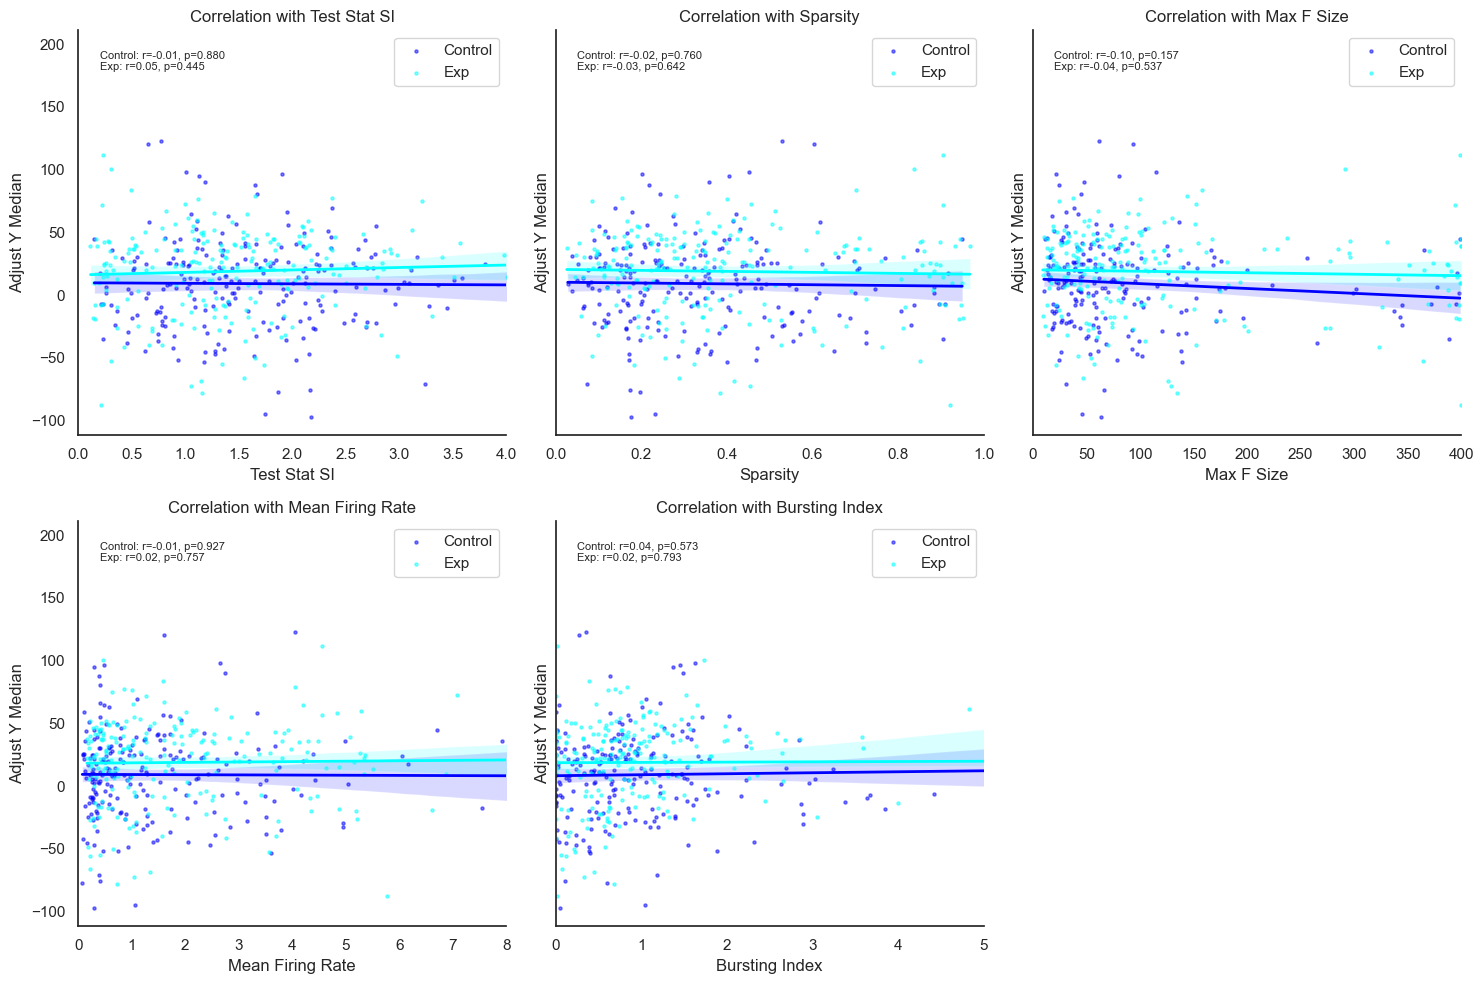

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

folder_path = r"S:\Sachuriga\filre_with_table\adjust_y_with _meanVAlue\clusters_with_tsneLabel\ripple_max\py_only"

# Function to get pickle files
def get_pkl_files(folder_path):
    all_files = os.listdir(folder_path)
    pkl_files = [f for f in all_files if f.endswith("withDLC.pkl")]
    return pkl_files

# Define group prefixes
target_prefixes_control = ['65165', '65091', '63383', '66539', '65622']
target_prefixes_exp = ['65588', '63385', '66538', '66537', '66922']

# Get the list of pickle files
pkl_files = get_pkl_files(folder_path)

# Initialize a list to store all DataFrames
all_dfs = []

# Process each pickle file
for file in pkl_files:
    df = pd.read_pickle(os.path.join(folder_path, file))
    df = df[(df['cell_type'] == "pyramidal") & (df['session'] == "A")]
    if df.empty:
        print(f"Warning: File {file} has no pyramidal cells")
        continue
    try:
        animal_id = df['animal_id'].iloc[0]
    except KeyError:
        print(f"Warning: File {file} does not have 'animal_id' column")
        continue
    if any(animal_id.startswith(prefix) for prefix in target_prefixes_control):
        df['group_ani'] = 'control'
    elif any(animal_id.startswith(prefix) for prefix in target_prefixes_exp):
        df['group_ani'] = 'exp'
    else:
        print(f"Warning: animal_id {animal_id} does not match any group")
        continue
    all_dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(all_dfs, ignore_index=True)

# Define the y-axis column variable
y_column = 'y_pos2ripple'  # Change this to "addjust y" or any other column as needed

# Collect the specified columns collectively for each group
control_data = combined_df[combined_df['group_ani'] == 'control'][
    [y_column, 'matlab_test_stat_si', 'matlab_sparsity', 'matlab_maxfsize', 'bursting_index', 'mean_firing_rate']
]
exp_data = combined_df[combined_df['group_ani'] == 'exp'][
    [y_column, 'matlab_test_stat_si', 'matlab_sparsity', 'matlab_maxfsize', 'bursting_index', 'mean_firing_rate']
]

# Convert to lists
control_addjust_y = control_data[y_column].to_list()
control_matlab_test_stat_si = control_data['matlab_test_stat_si'].to_list()
control_matlab_sparsity = control_data['matlab_sparsity'].to_list()
control_matlab_maxfsize = control_data['matlab_maxfsize'].to_list()
control_mean_firing_rate = control_data['mean_firing_rate'].to_list()
control_bursting_index = control_data['bursting_index'].to_list()

exp_addjust_y = exp_data[y_column].to_list()
exp_matlab_test_stat_si = exp_data['matlab_test_stat_si'].to_list()
exp_matlab_sparsity = exp_data['matlab_sparsity'].to_list()
exp_matlab_maxfsize = exp_data['matlab_maxfsize'].to_list()
exp_mean_firing_rate = exp_data['mean_firing_rate'].to_list()
exp_bursting_index = exp_data['bursting_index'].to_list()

# Reconstruct DataFrames from lists for plotting
control_df = pd.DataFrame({
    y_column: control_addjust_y,
    'matlab_test_stat_si': control_matlab_test_stat_si,
    'matlab_sparsity': control_matlab_sparsity,
    'matlab_maxfsize': control_matlab_maxfsize,
    'mean_firing_rate': control_mean_firing_rate,
    'bursting_index': control_bursting_index
})
exp_df = pd.DataFrame({
    y_column: exp_addjust_y,
    'matlab_test_stat_si': exp_matlab_test_stat_si,
    'matlab_sparsity': exp_matlab_sparsity,
    'matlab_maxfsize': exp_matlab_maxfsize,
    'mean_firing_rate': exp_mean_firing_rate,
    'bursting_index': exp_bursting_index
})

# Variables to analyze
variables = ['matlab_test_stat_si', 'matlab_sparsity', 'matlab_maxfsize', 'mean_firing_rate', 'bursting_index']
titles = ['Test Stat SI', 'Sparsity', 'Max F Size', 'Mean Firing Rate', 'Bursting Index']

# Calculate correlations and store them
correlations = {}
for var, title in zip(variables, titles):
    # Control group correlation
    control_clean = control_df[[var, y_column]].dropna()
    control_corr, control_p = pearsonr(control_clean[var], control_clean[y_column])
    
    # Experimental group correlation
    exp_clean = exp_df[[var, y_column]].dropna()
    exp_corr, exp_p = pearsonr(exp_clean[var], exp_clean[y_column])
    
    correlations[var] = {
        'control_r': control_corr,
        'control_p': control_p,
        'exp_r': exp_corr,
        'exp_p': exp_p
    }
    
    print(f"\n{title}:")
    print(f"Control Group: r = {control_corr:.3f}, p-value = {control_p:.3f}")
    print(f"Experimental Group: r = {exp_corr:.3f}, p-value = {exp_p:.3f}")

# Set up the plotting
sns.set(style="white")  # No grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axes = axes.flatten()

# Define x-axis limits (lower and upper) for each variable
x_limits = {
    'matlab_test_stat_si': (0, 4),      # Lower: 0, Upper: 4
    'matlab_sparsity': (0, 1.0),        # Lower: 0, Upper: 1.0
    'matlab_maxfsize': (0, 400),        # Lower: 0, Upper: 400
    'mean_firing_rate': (0, 8),         # Lower: 0, Upper: 8
    'bursting_index': (0, 5)            # Lower: 0, Upper: 5
}

# Plot each variable with regression lines and add statistics
for ax, var, title in zip(axes[:len(variables)], variables, titles):
    sns.regplot(x=var, y=y_column, data=control_df, ax=ax, color='blue', 
                label='Control', scatter_kws={'alpha': 0.5, "s": 5}, line_kws={'lw': 2})
    sns.regplot(x=var, y=y_column, data=exp_df, ax=ax, color='cyan', 
                label='Exp', scatter_kws={'alpha': 0.5, "s": 5}, line_kws={'lw': 2})
    ax.set_title(f'Correlation with {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Adjust Y Median')  # Update this label as needed
    ax.legend()
    
    # Set both lower and upper x-limits
    ax.set_xlim(x_limits[var][0], x_limits[var][1])
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add correlation stats on top of the plot
    stats_text = (f"Control: r={correlations[var]['control_r']:.2f}, p={correlations[var]['control_p']:.3f}\n"
                  f"Exp: r={correlations[var]['exp_r']:.2f}, p={correlations[var]['exp_p']:.3f}")
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=8, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remove the extra subplot (bottom right)
if len(variables) < len(axes):
    fig.delaxes(axes[-1])

fig.savefig(fr'Q:\sachuriga\CR_CA1_paper\Results\DeepVSsuperficial/deepVSsuperficial.eps', 
            format='eps', bbox_inches='tight')

plt.tight_layout()
plt.show()

KS Test Results:
Statistic: 0.1266
p-value: 0.0003

Quantiles:
Control: 2.5% = -46.86, 97.5% = 66.32
Experimental: 2.5% = -45.36, 97.5% = 65.02


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


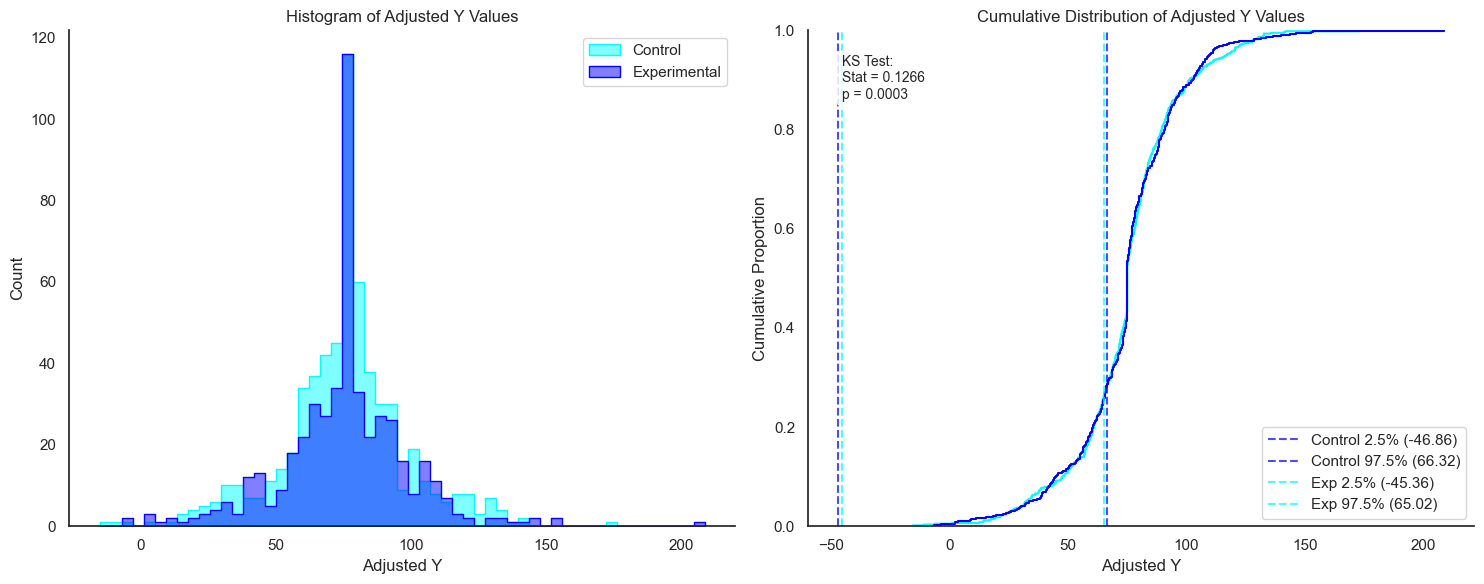

In [12]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import numpy as np

folder_path = r"S:\Sachuriga\filre_with_table\adjust_y_with _meanVAlue\clusters_with_tsneLabel\ripple_max\py_only"

def get_pkl_files(folder_path):
    all_files = os.listdir(folder_path)
    pkl_files = [f for f in all_files if f.endswith("withDLC.pkl")]
    return pkl_files

target_prefixes_control = ['65165', '65091', '63383', '66539', '65622']
target_prefixes_exp = ['65588', '63385', '66538', '66537', '66922']

pkl_files = get_pkl_files(folder_path)
all_dfs = []

for file in pkl_files:
    df = pd.read_pickle(os.path.join(folder_path, file))
    df = df[df['cell_type'] == "pyramidal"]
    if df.empty:
        print(f"Warning: File {file} has no pyramidal cells")
        continue
    try:
        animal_id = df['animal_id'].iloc[0]
    except KeyError:
        print(f"Warning: File {file} does not have 'animal_id' column")
        continue
    if any(animal_id.startswith(prefix) for prefix in target_prefixes_control):
        df['group_ani'] = 'control'
    elif any(animal_id.startswith(prefix) for prefix in target_prefixes_exp):
        df['group_ani'] = 'exp'
    else:
        print(f"Warning: animal_id {animal_id} does not match any group")
        continue
    all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)

# Separate data for KS test and quantiles
control_data = combined_df[combined_df['group_ani'] == 'control']['y_pos2ripple'].dropna()
exp_data = combined_df[combined_df['group_ani'] == 'exp']['y_pos2ripple'].dropna()

# Perform KS test
ks_stat, ks_p = ks_2samp(control_data, exp_data)
print(f"KS Test Results:")
print(f"Statistic: {ks_stat:.4f}")
print(f"p-value: {ks_p:.4f}")

# Calculate 2.5th and 97.5th percentiles
control_q2_5 = np.percentile(control_data, 5)
control_q97_5 = np.percentile(control_data, 95)
exp_q2_5 = np.percentile(exp_data, 5)
exp_q97_5 = np.percentile(exp_data, 95)
print(f"\nQuantiles:")
print(f"Control: 2.5% = {control_q2_5:.2f}, 97.5% = {control_q97_5:.2f}")
print(f"Experimental: 2.5% = {exp_q2_5:.2f}, 97.5% = {exp_q97_5:.2f}")

# Create figure with two subplots: Histogram and CDF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.set(style="white")

# Histogram (left subplot)
sns.histplot(data=combined_df, x='addjust y', hue='group_ani', 
             element="step", stat="count",
             palette=['blue', 'cyan'], alpha=0.5, ax=ax1)
ax1.set_title('Histogram of Adjusted Y Values')
ax1.set_xlabel('Adjusted Y')
ax1.set_ylabel('Count')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(labels=['Control', 'Experimental'])

# CDF (right subplot)
sns.ecdfplot(data=combined_df, x='addjust y', hue='group_ani', 
             palette=['blue', 'cyan'], ax=ax2)
ax2.set_title('Cumulative Distribution of Adjusted Y Values')
ax2.set_xlabel('Adjusted Y')
ax2.set_ylabel('Cumulative Proportion')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Add 2.5th and 97.5th percentile lines for control
ax2.axvline(x=control_q2_5, color='blue', linestyle='--', alpha=0.7,
           label=f'Control 2.5% ({control_q2_5:.2f})')
ax2.axvline(x=control_q97_5, color='blue', linestyle='--', alpha=0.7,
           label=f'Control 97.5% ({control_q97_5:.2f})')

# Add 2.5th and 97.5th percentile lines for experimental
ax2.axvline(x=exp_q2_5, color='cyan', linestyle='--', alpha=0.7,
           label=f'Exp 2.5% ({exp_q2_5:.2f})')
ax2.axvline(x=exp_q97_5, color='cyan', linestyle='--', alpha=0.7,
           label=f'Exp 97.5% ({exp_q97_5:.2f})')

ax2.legend()

# Add KS test results as text
ks_text = f"KS Test:\nStat = {ks_stat:.4f}\np = {ks_p:.4f}"
ax2.text(0.05, 0.95, ks_text, transform=ax2.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Save the figure
plt.savefig(fr'Q:\sachuriga\CR_CA1_paper\Results\DeepVSsuperficial/adjusted_y_hist_cdf_2_5_97_5.eps', 
            format='eps', bbox_inches='tight')

plt.tight_layout()
plt.show()

Control Quantiles: 5% = -44.64, 95% = 80.62
Experimental Quantiles: 5% = -63.32, 95% = 80.32

Test Stat SI (Filtered 90% range):
Control Group: r = 0.046, p-value = 0.261
Experimental Group: r = 0.037, p-value = 0.325

Sparsity (Filtered 90% range):
Control Group: r = -0.050, p-value = 0.219
Experimental Group: r = -0.005, p-value = 0.889

Max F Size (Filtered 90% range):
Control Group: r = -0.047, p-value = 0.252
Experimental Group: r = 0.013, p-value = 0.730

Mean Firing Rate (Filtered 90% range):
Control Group: r = 0.054, p-value = 0.185
Experimental Group: r = 0.084, p-value = 0.026

Bursting Index (Filtered 90% range):
Control Group: r = -0.020, p-value = 0.619
Experimental Group: r = 0.059, p-value = 0.118


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


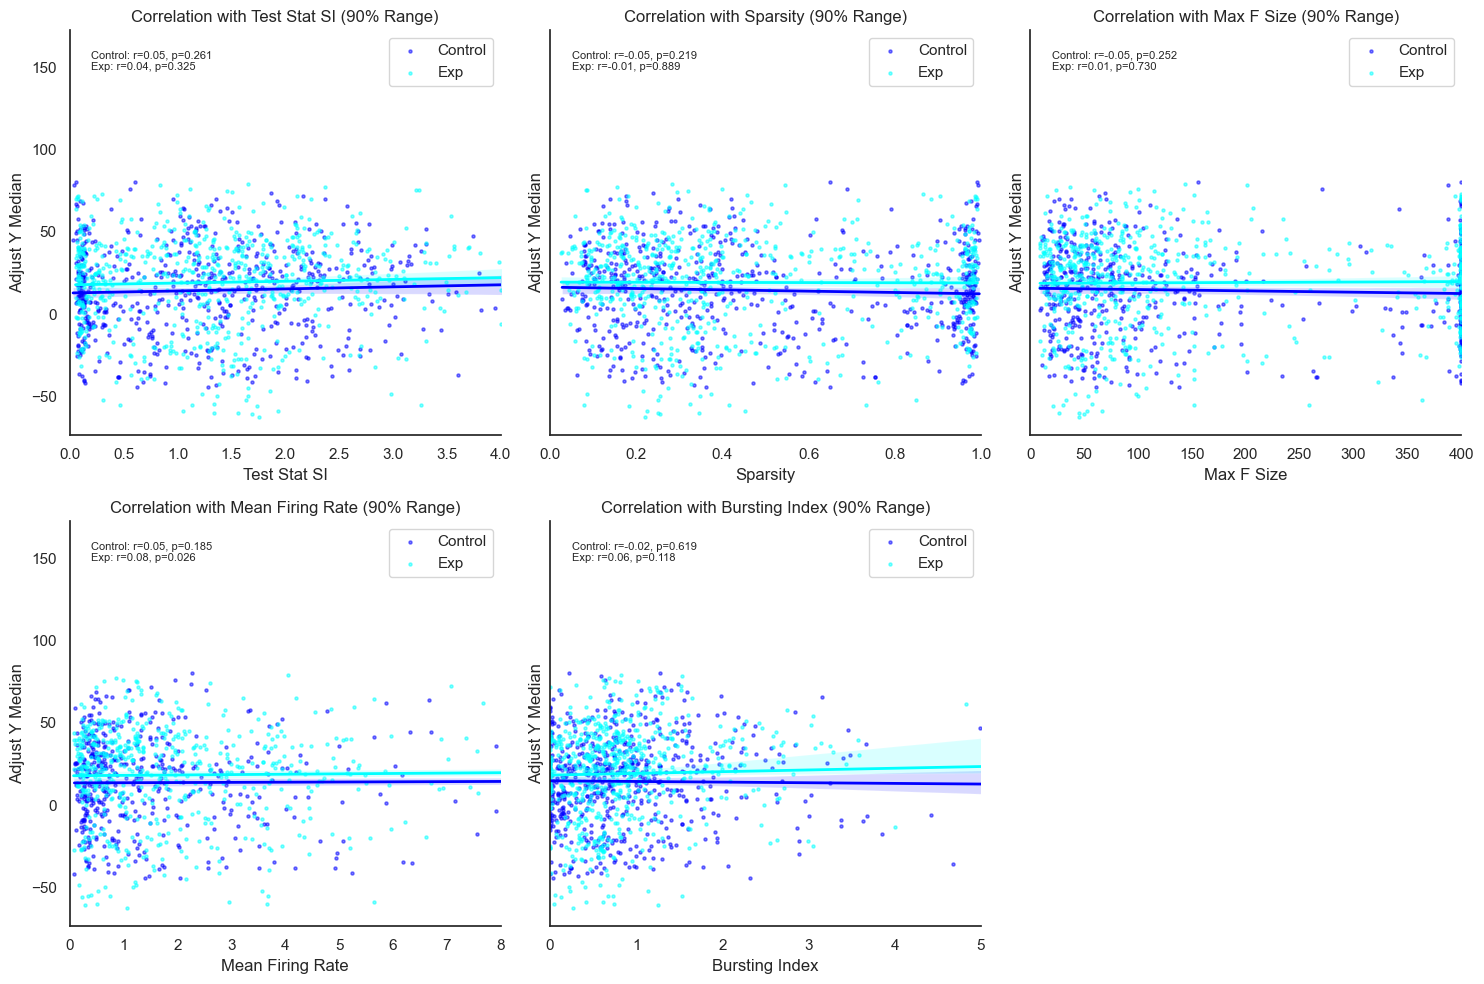

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

folder_path = r"S:\Sachuriga\filre_with_table\adjust_y_with _meanVAlue\clusters_with_tsneLabel\ripple_max\py_only"

# Function to get pickle files
def get_pkl_files(folder_path):
    all_files = os.listdir(folder_path)
    pkl_files = [f for f in all_files if f.endswith("withDLC.pkl")]
    return pkl_files

# Define group prefixes
target_prefixes_control = ['65165', '65091', '63383', '66539', '65622']
target_prefixes_exp = ['65588', '63385', '66538', '66537', '66922']

# Get the list of pickle files
pkl_files = get_pkl_files(folder_path)

# Initialize a list to store all DataFrames
all_dfs = []

# Process each pickle file
for file in pkl_files:
    df = pd.read_pickle(os.path.join(folder_path, file))
    #df = df[(df['cell_type'] == "pyramidal") & (df['session'] == "A") ]
    if df.empty:
        print(f"Warning: File {file} has no pyramidal cells")
        continue
    try:
        animal_id = df['animal_id'].iloc[0]
    except KeyError:
        print(f"Warning: File {file} does not have 'animal_id' column")
        continue
    if any(animal_id.startswith(prefix) for prefix in target_prefixes_control):
        df['group_ani'] = 'control'
    elif any(animal_id.startswith(prefix) for prefix in target_prefixes_exp):
        df['group_ani'] = 'exp'
    else:
        print(f"Warning: animal_id {animal_id} does not match any group")
        continue
    all_dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(all_dfs, ignore_index=True)

# Define the y-axis column variable
y_column = 'y_pos2ripple'

# Calculate 5th and 95th quantiles for the 90% range
control_data = combined_df[combined_df['group_ani'] == 'control'][y_column].dropna()
exp_data = combined_df[combined_df['group_ani'] == 'exp'][y_column].dropna()

control_q5 = np.percentile(control_data, 5)
control_q95 = np.percentile(control_data, 95)
exp_q5 = np.percentile(exp_data, 5)
exp_q95 = np.percentile(exp_data, 95)

print(f"Control Quantiles: 5% = {control_q5:.2f}, 95% = {control_q95:.2f}")
print(f"Experimental Quantiles: 5% = {exp_q5:.2f}, 95% = {exp_q95:.2f}")

# Filter data to keep only values within the 90% range
control_filtered = combined_df[
    (combined_df['group_ani'] == 'control') & 
    (combined_df[y_column] >= control_q5) & 
    (combined_df[y_column] <= control_q95)
]
exp_filtered = combined_df[
    (combined_df['group_ani'] == 'exp') & 
    (combined_df[y_column] >= exp_q5) & 
    (combined_df[y_column] <= exp_q95)
]

# Combine filtered data
filtered_df = pd.concat([control_filtered, exp_filtered], ignore_index=True)

# Collect the specified columns for each group from filtered data
control_data = filtered_df[filtered_df['group_ani'] == 'control'][
    [y_column, 'matlab_test_stat_si', 'matlab_sparsity', 'matlab_maxfsize', 'bursting_index', 'mean_firing_rate']
]
exp_data = filtered_df[filtered_df['group_ani'] == 'exp'][
    [y_column, 'matlab_test_stat_si', 'matlab_sparsity', 'matlab_maxfsize', 'bursting_index', 'mean_firing_rate']
]

# Convert to lists
control_addjust_y = control_data[y_column].to_list()
control_matlab_test_stat_si = control_data['matlab_test_stat_si'].to_list()
control_matlab_sparsity = control_data['matlab_sparsity'].to_list()
control_matlab_maxfsize = control_data['matlab_maxfsize'].to_list()
control_mean_firing_rate = control_data['mean_firing_rate'].to_list()
control_bursting_index = control_data['bursting_index'].to_list()

exp_addjust_y = exp_data[y_column].to_list()
exp_matlab_test_stat_si = exp_data['matlab_test_stat_si'].to_list()
exp_matlab_sparsity = exp_data['matlab_sparsity'].to_list()
exp_matlab_maxfsize = exp_data['matlab_maxfsize'].to_list()
exp_mean_firing_rate = exp_data['mean_firing_rate'].to_list()
exp_bursting_index = exp_data['bursting_index'].to_list()

# Reconstruct DataFrames from lists for plotting
control_df = pd.DataFrame({
    y_column: control_addjust_y,
    'matlab_test_stat_si': control_matlab_test_stat_si,
    'matlab_sparsity': control_matlab_sparsity,
    'matlab_maxfsize': control_matlab_maxfsize,
    'mean_firing_rate': control_mean_firing_rate,
    'bursting_index': control_bursting_index
})
exp_df = pd.DataFrame({
    y_column: exp_addjust_y,
    'matlab_test_stat_si': exp_matlab_test_stat_si,
    'matlab_sparsity': exp_matlab_sparsity,
    'matlab_maxfsize': exp_matlab_maxfsize,
    'mean_firing_rate': exp_mean_firing_rate,
    'bursting_index': exp_bursting_index
})

# Variables to analyze
variables = ['matlab_test_stat_si', 'matlab_sparsity', 'matlab_maxfsize', 'mean_firing_rate', 'bursting_index']
titles = ['Test Stat SI', 'Sparsity', 'Max F Size', 'Mean Firing Rate', 'Bursting Index']

# Calculate correlations and store them
correlations = {}
for var, title in zip(variables, titles):
    # Control group correlation
    control_clean = control_df[[var, y_column]].dropna()
    control_corr, control_p = pearsonr(control_clean[var], control_clean[y_column])
    
    # Experimental group correlation
    exp_clean = exp_df[[var, y_column]].dropna()
    exp_corr, exp_p = pearsonr(exp_clean[var], exp_clean[y_column])
    
    correlations[var] = {
        'control_r': control_corr,
        'control_p': control_p,
        'exp_r': exp_corr,
        'exp_p': exp_p
    }
    
    print(f"\n{title} (Filtered 90% range):")
    print(f"Control Group: r = {control_corr:.3f}, p-value = {control_p:.3f}")
    print(f"Experimental Group: r = {exp_corr:.3f}, p-value = {exp_p:.3f}")

# Set up the plotting
sns.set(style="white")
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axes = axes.flatten()

# Define x-axis limits for each variable
x_limits = {
    'matlab_test_stat_si': (0, 4),
    'matlab_sparsity': (0, 1.0),
    'matlab_maxfsize': (0, 400),
    'mean_firing_rate': (0, 8),
    'bursting_index': (0, 5)
}

# Plot each variable with regression lines and add statistics
for ax, var, title in zip(axes[:len(variables)], variables, titles):
    sns.regplot(x=var, y=y_column, data=control_df, ax=ax, color='blue', 
                label='Control', scatter_kws={'alpha': 0.5, "s": 5}, line_kws={'lw': 2})
    sns.regplot(x=var, y=y_column, data=exp_df, ax=ax, color='cyan', 
                label='Exp', scatter_kws={'alpha': 0.5, "s": 5}, line_kws={'lw': 2})
    ax.set_title(f'Correlation with {title} (90% Range)')
    ax.set_xlabel(title)
    ax.set_ylabel('Adjust Y Median')
    ax.legend()
    
    # Set x-limits
    ax.set_xlim(x_limits[var][0], x_limits[var][1])
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add correlation stats
    stats_text = (f"Control: r={correlations[var]['control_r']:.2f}, p={correlations[var]['control_p']:.3f}\n"
                  f"Exp: r={correlations[var]['exp_r']:.2f}, p={correlations[var]['exp_p']:.3f}")
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=8, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remove the extra subplot
if len(variables) < len(axes):
    fig.delaxes(axes[-1])

fig.savefig(fr'Q:\sachuriga\CR_CA1_paper\Results\DeepVSsuperficial/deepVSsuperficial_90percent_range.eps', 
            format='eps', bbox_inches='tight')

plt.tight_layout()
plt.show()

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecat

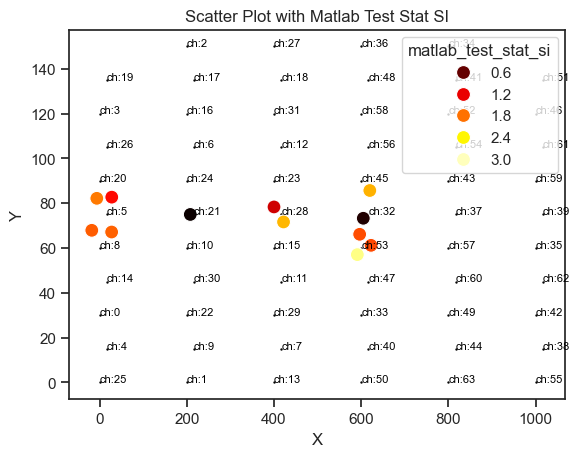

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
file_path = r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb"

# Read the file and parse the dictionary
local_vars = {'np': np}
with open(file_path, 'r') as file:
    exec(file.read(), local_vars)  # Execute the file content with NumPy in scope

    
channel_groups = local_vars.get('channel_groups')
if channel_groups is None:
    raise ValueError(f"'channel_groups' not found in {file_path}")

# Assuming channel_groups is loaded from Step 1
data = []
for group_id, group_data in channel_groups.items():
    channels = group_data['channels']
    geometry = group_data['geometry']
    for channel in channels:
        x, y = geometry[channel]
        data.append({
            'group_id': group_id,
            'channel_id': channel,
            'x': x,
            'y': y
        })
probe_df = pd.DataFrame(data)


for i in range(64):
    ch = i
    plt.scatter(probe_df[probe_df['channel_id']==ch]['x'], probe_df[probe_df['channel_id']==ch]['y'], marker='o',color='black',s=0.5)  # Using scatter instead of plot to show dots
    #plt.scatter(probe_df[probe_df['channel_id']==median_list[i]]['x'], probe_df[probe_df['channel_id']==median_list[i]]['y'], marker='^')
    plt.text(probe_df[probe_df['channel_id']==ch]['x'], probe_df[probe_df['channel_id']==ch]['y'], fr"ch:{i}", fontsize=8, color='black')

# df_good = df_unit_table[df_unit_table['unit_quality']=="good"]
# df_py = df_good[df_good['cell_type']=="Pyramidal cells"]

df_py = pd.read_pickle(r"S:\Sachuriga\filre_with_table\adjust_y_with _meanVAlue\clusters_with_tsneLabel/63385_2024-07-22_A_units_table_withDLC.pkl")
#df_py = df_list_actual
df_py = df_py[df_py['cell_type']=="pyramidal"]

x=df_py['x']
y=df_py['addjust y']
hue = df_py['matlab_test_stat_si']
hot_cmap = plt.get_cmap('hot')
# Create the scatter plot
sns.scatterplot(x=x, y=y, hue=hue, palette=hot_cmap,s=100)

# Optional: Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Matlab Test Stat SI')

# Show the plot
plt.show()

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecat

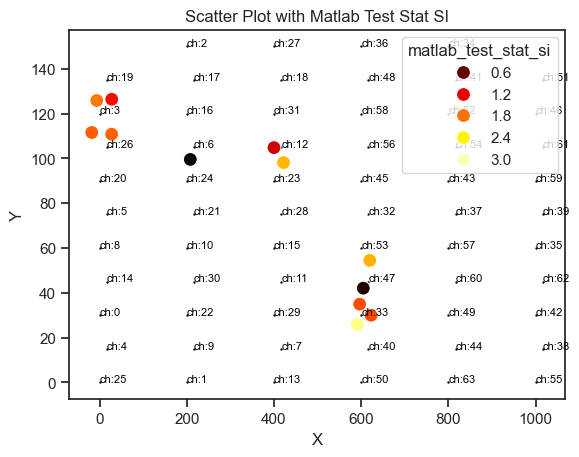

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb"

# Read the file and parse the dictionary
local_vars = {'np': np}
with open(file_path, 'r') as file:
    exec(file.read(), local_vars)  # Execute the file content with NumPy in scope

    
channel_groups = local_vars.get('channel_groups')
if channel_groups is None:
    raise ValueError(f"'channel_groups' not found in {file_path}")

# Assuming channel_groups is loaded from Step 1
data = []
for group_id, group_data in channel_groups.items():
    channels = group_data['channels']
    geometry = group_data['geometry']
    for channel in channels:
        x, y = geometry[channel]
        data.append({
            'group_id': group_id,
            'channel_id': channel,
            'x': x,
            'y': y
        })
probe_df = pd.DataFrame(data)


for i in range(64):
    ch = i
    plt.scatter(probe_df[probe_df['channel_id']==ch]['x'], probe_df[probe_df['channel_id']==ch]['y'], marker='o',color='black',s=0.5)  # Using scatter instead of plot to show dots
    #plt.scatter(probe_df[probe_df['channel_id']==median_list[i]]['x'], probe_df[probe_df['channel_id']==median_list[i]]['y'], marker='^')
    plt.text(probe_df[probe_df['channel_id']==ch]['x'], probe_df[probe_df['channel_id']==ch]['y'], fr"ch:{i}", fontsize=8, color='black')

# df_good = df_unit_table[df_unit_table['unit_quality']=="good"]
# df_py = df_good[df_good['cell_type']=="Pyramidal cells"]

df_py = df_py[df_py['cell_type']=="pyramidal"]
x=df_py['x']
y=df_py['y']
hue = df_py['matlab_test_stat_si']
hot_cmap = plt.get_cmap('hot')
# Create the scatter plot
sns.scatterplot(x=x, y=y, hue=hue, palette=hot_cmap,s=100)

# Optional: Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Matlab Test Stat SI')

# Show the plot
plt.show()


In [2]:
import pandas as pd

DF = pd.read_pickle(r"S:\Sachuriga\filre_with_table\adjust_y_with _meanVAlue\clusters_with_tsneLabel\ripple_max/63383_2024-07-10_A_units_table_withDLC.pkl")
DF

,level_0,index,spike_times,unit_name,nn_miss_rate,num_negative_peaks.1,recovery_slope,amplitude_median,recovery_slope.1,cluster_id.21,...,cell_type_group_2_group,session,ch,addjust y,bursting_index,mean_firing_rate,addjust y median,rate_map,ripple_ch,shank_group
0,0,0,"[79.80586666666666, 82.36903333333333, 82.5270...",5,0.009684,1.0,-135826.081350,-474.629974,-135826.081350,0.0,...,0,A,19,71.096194,0.285714,0.185600,75.000000,None,3,0
1,1,1,"[355.5495666666667, 494.1717, 555.7439, 658.68...",6,0.000857,1.0,-189691.323121,-874.379944,-189691.323121,1.0,...,0,A,19,60.289534,1.500000,0.144488,64.193340,None,3,0
2,2,2,"[82.09543333333333, 136.72986666666668, 136.74...",54,0.017727,1.0,-78118.659925,-465.659973,-78118.659925,14.0,...,0,A,19,93.614271,1.528302,0.354847,97.518077,"[[0.6010872216953045, 1.9740623573097393, 2.61...",3,0
3,3,3,"[64.0384, 64.07413333333334, 64.1816, 64.1974,...",3,0.051157,1.0,-84398.764292,-276.509979,-84398.764292,17.0,...,2,A,19,59.535696,0.430479,20.360666,63.439501,None,3,0
0,0,0,"[85.13216666666666, 85.2458, 85.54376666666667...",14,0.000667,1.0,-130640.317634,-578.077515,-130640.317634,2.0,...,0,A,6,65.555132,1.039216,0.412639,62.815960,"[[0.0, 0.028323072264804038, 0.375102955835494...",6,1
1,1,1,"[64.0338, 64.04926666666667, 64.14776666666667...",8,0.043691,1.0,-41703.661563,-217.229980,-41703.661563,19.0,...,0,A,16,63.614912,0.013016,17.217558,60.875740,None,6,1
2,2,2,"[76.90883333333333, 84.95836666666666, 88.5522...",9,0.012146,1.0,-108480.483263,-311.804993,-108480.483263,20.0,...,0,A,16,77.739171,0.347280,1.525912,75.000000,"[[2.3186448950853498, 0.06248028237314415, 0.0...",6,1
3,3,3,"[69.25403333333334, 69.27493333333334, 69.4856...",13,0.024629,1.0,-102456.294835,-409.889984,-102456.294835,21.0,...,0,A,17,81.705697,0.488055,1.900933,78.966526,"[[0.11984338961442374, 0.3148672148351371, 0.0...",6,1
0,0,0,"[64.58993333333333, 64.67256666666667, 64.6925...",17,0.002000,1.0,-43784.124843,-261.299988,-43784.124843,3.0,...,0,A,11,41.239010,0.037838,1.392265,25.485394,"[[0.24056495059718933, 0.10534027815411098, 0....",28,2
1,1,1,"[80.59643333333334, 80.6237, 80.6897, 80.7649,...",20,0.009000,1.0,-114143.425971,-471.314972,-114143.425971,4.0,...,0,A,23,93.007374,0.589552,0.965041,77.253757,"[[0.21987368449301642, 0.3301023104264661, 0.2...",28,2
